# WeatherPy
----
## Analysis
- You can clearly see a relationship between the northern hemisphere and max temperature. The further north, the colder it get. We see a slight correlation in the southern hemisphere, with the warmest temperature being around the equator.

- I found no correlation between latitude and humidity. There did appear to be some drop in humidity between 0 and 40 degrees latitude before spiking again. Perhaps due to weather systems.

- I found no correlation between wind speed and latitude. And I found no correlation between cloudiness and latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=3200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=3200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1055

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url = api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units=imperial
base_url = 'http://api.openweathermap.org/data/2.5/weather?&appid='+weather_api_key+'&units=imperial&q=' 

# use variable to track count of cities 
cityCount = 1

# use variables to store values from api
lat_list = []
lon_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []
country_list = []
date_list = []
city_list = []


print(f'Begin Data Retrevial')
print(f'------------------')

# for each city in the list attempt to get weather data
for city in cities:
    
    # attempt to get response data from open weather map api
    try:
        
        print(f'Processing Record {cityCount} | {city}')
        cityCount += 1
        url = base_url+city
        response = requests.get(url).json()

        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        #store data
        lat_list.append(lat)
        lon_list.append(lon)
        temp_list.append(temp)
        humidity_list.append(humidity)
        clouds_list.append(clouds)
        wind_list.append(wind)
        country_list.append(country)
        date_list.append(date)
        city_list.append(city)
    
    # skip city if response fails
    except:
        print(f'{city} not found. Skipping...')
        pass
    
    time.sleep(2) # Sleep for 2 seconds
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begin Data Retrevial
------------------
Processing Record 1 | hobart
Processing Record 2 | auki
Processing Record 3 | vaini
Processing Record 4 | ushuaia
Processing Record 5 | neuquen
Processing Record 6 | jamestown
Processing Record 7 | acapulco
Processing Record 8 | cape town
Processing Record 9 | rikitea
Processing Record 10 | ostrov
Processing Record 11 | mataura
Processing Record 12 | vardo
Processing Record 13 | filingue
Processing Record 14 | hermanus
Processing Record 15 | saint george
Processing Record 16 | koumac
Processing Record 17 | harper
Processing Record 18 | saint-philippe
Processing Record 19 | chitungwiza
Processing Record 20 | taolanaro
taolanaro not found. Skipping...
Processing Record 21 | punta arenas
Processing Record 22 | khatanga
Processing Record 23 | bethel
Processing Record 24 | dogondoutchi
Processing Record 25 | kresek
Processing Record 26 | blagoyevo
Processing Record 27 | tuatapere
Processing Record 28 | qaanaaq
Processing Record 29 | atuona
Processing 

Processing Record 235 | viedma
Processing Record 236 | atasu
Processing Record 237 | rantepao
Processing Record 238 | clyde river
Processing Record 239 | lasa
Processing Record 240 | thabazimbi
Processing Record 241 | eyl
Processing Record 242 | alekseyevka
Processing Record 243 | new norfolk
Processing Record 244 | garowe
Processing Record 245 | katsuura
Processing Record 246 | salinopolis
Processing Record 247 | lom sak
Processing Record 248 | darnah
Processing Record 249 | jumla
Processing Record 250 | longyearbyen
Processing Record 251 | smithers
Processing Record 252 | margate
Processing Record 253 | zhangjiakou
Processing Record 254 | te anau
Processing Record 255 | brae
Processing Record 256 | sinnamary
Processing Record 257 | mangaratiba
Processing Record 258 | kruisfontein
Processing Record 259 | jamsa
Processing Record 260 | suzhou
Processing Record 261 | rome
Processing Record 262 | victoria
Processing Record 263 | verkhoyansk
Processing Record 264 | warqla
warqla not found.

Processing Record 457 | riihimaki
Processing Record 458 | kidal
Processing Record 459 | tautira
Processing Record 460 | grand gaube
Processing Record 461 | ampanihy
Processing Record 462 | tumannyy
tumannyy not found. Skipping...
Processing Record 463 | wanaka
Processing Record 464 | kachiry
Processing Record 465 | bathsheba
Processing Record 466 | mingshui
Processing Record 467 | unguras
Processing Record 468 | lensk
Processing Record 469 | nadym
Processing Record 470 | iskateley
Processing Record 471 | lubango
Processing Record 472 | shimoda
Processing Record 473 | mundra
Processing Record 474 | pahrump
Processing Record 475 | bandarbeyla
Processing Record 476 | port hardy
Processing Record 477 | pasni
Processing Record 478 | linxia
Processing Record 479 | tambopata
Processing Record 480 | magui
magui not found. Skipping...
Processing Record 481 | hualmay
Processing Record 482 | rio gallegos
Processing Record 483 | celestun
Processing Record 484 | gizo
Processing Record 485 | pangnir

Processing Record 689 | oranjestad
Processing Record 690 | corinto
Processing Record 691 | balkanabat
Processing Record 692 | sondershausen
Processing Record 693 | rabo de peixe
Processing Record 694 | kuytun
Processing Record 695 | mombetsu
Processing Record 696 | shiyan
Processing Record 697 | damghan
Processing Record 698 | san policarpo
Processing Record 699 | normal
Processing Record 700 | nalut
Processing Record 701 | hella
Processing Record 702 | roros
Processing Record 703 | loukhi
Processing Record 704 | purpe
Processing Record 705 | binzhou
Processing Record 706 | dudinka
Processing Record 707 | norsup
Processing Record 708 | olafsvik
Processing Record 709 | cabo rojo
Processing Record 710 | haubourdin
Processing Record 711 | shieli
Processing Record 712 | caravelas
Processing Record 713 | deputatskiy
Processing Record 714 | dengzhou
Processing Record 715 | bahar
Processing Record 716 | jati
Processing Record 717 | teluknaga
Processing Record 718 | fort morgan
Processing Reco

Processing Record 925 | pangoa
Processing Record 926 | sobolevo
Processing Record 927 | santa isabel do rio negro
Processing Record 928 | corowa
Processing Record 929 | pak phanang
Processing Record 930 | guiratinga
Processing Record 931 | paka
Processing Record 932 | scottsburgh
scottsburgh not found. Skipping...
Processing Record 933 | mercedes
Processing Record 934 | ovalle
Processing Record 935 | chik
Processing Record 936 | marsa matruh
Processing Record 937 | palabuhanratu
palabuhanratu not found. Skipping...
Processing Record 938 | tasbuget
tasbuget not found. Skipping...
Processing Record 939 | newport
Processing Record 940 | sonkovo
Processing Record 941 | itaituba
Processing Record 942 | southbridge
Processing Record 943 | myitkyina
Processing Record 944 | benghazi
Processing Record 945 | maragogi
Processing Record 946 | mampong
Processing Record 947 | batticaloa
Processing Record 948 | pedernales
Processing Record 949 | sawakin
Processing Record 950 | buta
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({'City': city_list,
                        'Lat': lat_list,
                        'Lng': lon_list,
                        'Max Temp': temp_list,
                        'Humidity': humidity_list,
                        'Cloudiness': clouds_list,
                        'Wind Speed': wind_list,
                        'Country': country_list,
                        'Date': date_list
                       })

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,69.80,30,0,19.57,AU,1613960372
1,auki,-8.7676,160.7034,83.98,79,94,4.14,SB,1613960387
2,vaini,-21.2000,-175.2000,82.40,69,40,13.80,TO,1613960389
3,ushuaia,-54.8000,-68.3000,41.00,81,75,6.91,AR,1613960392
4,neuquen,-38.9516,-68.0591,69.80,40,0,9.22,AR,1613960394


In [5]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,9.730000e+02
mean,21.597710,20.763509,50.283916,72.885920,54.105858,7.402025,1.613962e+09
std,31.298859,86.125639,31.419684,19.627088,42.004239,5.754230,6.698104e+02
min,-54.800000,-179.166700,-41.420000,15.000000,0.000000,0.220000,1.613960e+09
25%,-3.770300,-53.806900,33.750000,64.000000,1.000000,3.150000,1.613961e+09
50%,26.286700,25.136100,60.800000,78.000000,75.000000,5.790000,1.613962e+09
75%,48.052600,93.040800,74.700000,87.000000,97.000000,9.910000,1.613962e+09
max,78.218600,178.416700,102.200000,100.000000,100.000000,36.820000,1.613963e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
bad_data = city_df.loc[city_df['Humidity'] > 100].index

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(bad_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,69.80,30,0,19.57,AU,1613960372
1,auki,-8.7676,160.7034,83.98,79,94,4.14,SB,1613960387
2,vaini,-21.2000,-175.2000,82.40,69,40,13.80,TO,1613960389
3,ushuaia,-54.8000,-68.3000,41.00,81,75,6.91,AR,1613960392
4,neuquen,-38.9516,-68.0591,69.80,40,0,9.22,AR,1613960394


In [8]:
# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# Get today's date
# using now() to get current time  
current_time = datetime.datetime.now()  
year = current_time.year
month = current_time.month
day = current_time.day
date = "-".join([str(month),str(day),str(year)])

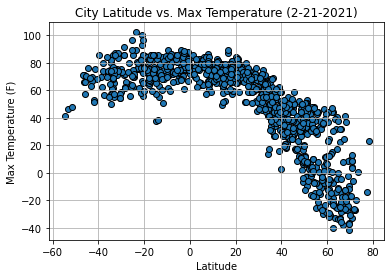

In [10]:
# latitude vs. temperature scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Max Temp'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/latVStemp.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the highest temperature on a single day.
In this case it shows it colder in the north (positive latitude) than it is in the south (negative latitude).

## Latitude vs. Humidity Plot

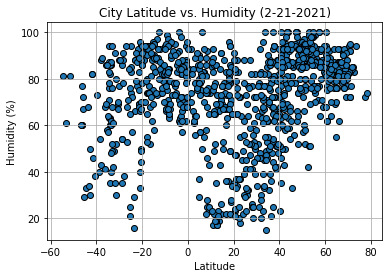

In [11]:
# latitude vs. humidity scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Humidity'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_humidity.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the humidity on a single day.
In this case there does not appear to be a strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

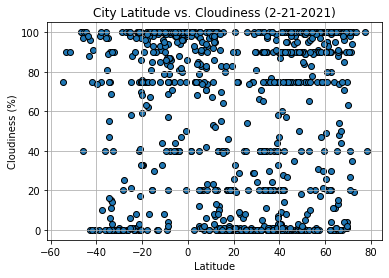

In [12]:
# latitude vs. cloudiness scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_cloudiness.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the cloudiness on a single day. In this case there does not appear to be a strong correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

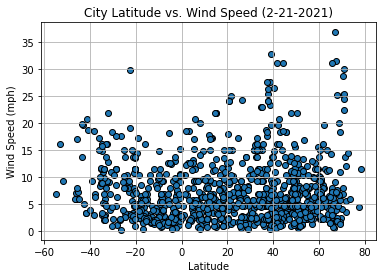

In [13]:
# latitude vs. wind speed scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_windSpeed.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the wind speed on a single day. In this case there does not appear to be a strong correlation between latitude and wind speed.

## Linear Regression

In [14]:
# linear regression calculation & plot function
def lin_regress(x_values, y_values, ylabel, text_coordinates):
    
    # calculate regression value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # create scatter plot
    plt.scatter(x_values,y_values)
    
    # create regession line & display equation
    plt.plot(x_values,regression_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # add axis & plot titles
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    
    # print r value
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [15]:
north_hem = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
south_hem = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7306184600330229


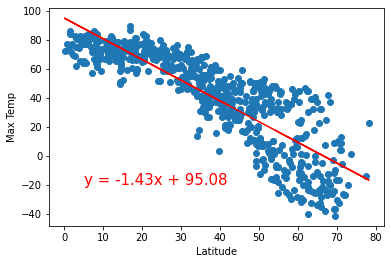

In [16]:
lin_regress(north_hem['Lat'], north_hem['Max Temp'], 'Max Temp', (5,-20))

The high r-value indicates a strong correlation between max temperature and latitude. The correlation in this case is negative. The further north, the lower the temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.12471311553430647


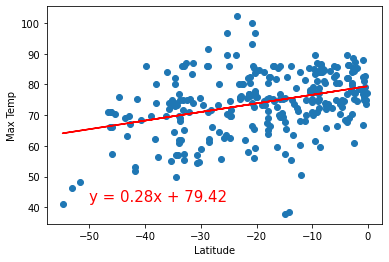

In [17]:
lin_regress(south_hem['Lat'], south_hem['Max Temp'], 'Max Temp', (-50,42))

The low r-value does not indicate a strong correlation between max temperature and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15973840065783773


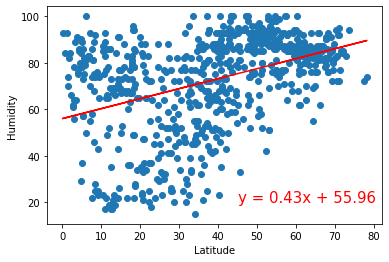

In [18]:
lin_regress(north_hem['Lat'], north_hem['Humidity'], 'Humidity', (45,20))

The low r-value show little or no correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13859370427545956


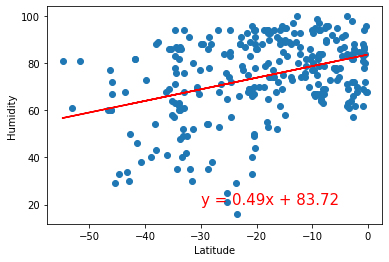

In [19]:
lin_regress(south_hem['Lat'], south_hem['Humidity'], 'Humidity', (-30,20))

The low r-value suggests a weak correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05373714091494603


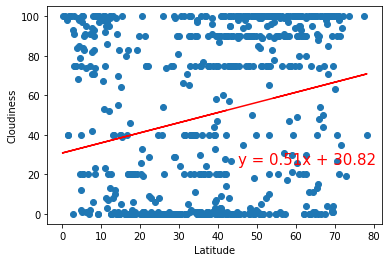

In [20]:
lin_regress(north_hem['Lat'], north_hem['Cloudiness'], 'Cloudiness', (45,25))

The low r-value suggests a weak correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13229323803630386


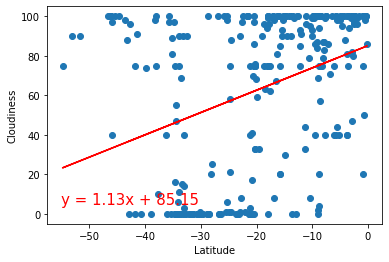

In [21]:
lin_regress(south_hem['Lat'], south_hem['Cloudiness'], 'Cloudiness', (-55,5))

The low r-value suggests a weak correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0012772389169441029


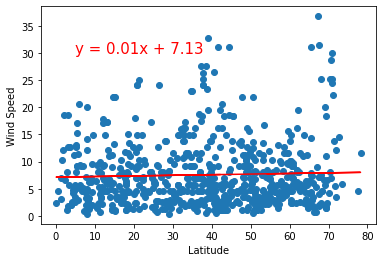

In [22]:
lin_regress(north_hem['Lat'], north_hem['Wind Speed'], 'Wind Speed', (5,30))

The low r-value suggests a weak correlation between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11014328329747611


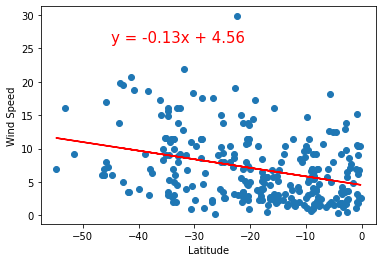

In [23]:
lin_regress(south_hem['Lat'], south_hem['Wind Speed'], 'Wind Speed', (-45,26))

The low r-value suggests a weak correlation between wind speed and latitude.